<h1 align="center"> <strong>📈 Linear Regression - Complete Guide</strong> </h1>

This notebook provides a comprehensive introduction to Linear Regression, covering:
- Mathematical foundation
- Implementation from scratch
- Scikit-learn implementation
- Model evaluation and interpretation
- Assumptions checking

<div style="width: 100%; height: 20px; background: linear-gradient(to right, gray, white, orange,white, gray); border-radius: 5px; margin: 20px 0;"></div>

## 📊 **2. Types of Linear Regression – Comparison Table**

| 📌 **Type**         | 🧠 **Use Case**                       | 📝 **Notes**                                       |
| ------------------- | ------------------------------------- | -------------------------------------------------- |
| **Simple Linear**   | One independent variable              | Basic linear trend between two variables           |
| **Multiple Linear** | Multiple independent variables        | Adds more predictors to improve accuracy           |
| **Polynomial**      | Non-linear relationships              | Still linear in coefficients (β), fits curved data |
| **Ridge**           | Regularization (L2)                   | Shrinks all coefficients, reduces overfitting      |
| **Lasso**           | L1 Regularization + Feature Selection | Can shrink some coefficients to zero               |
| **Elastic Net**     | Combines Lasso and Ridge              | Useful when predictors are correlated              |

---

### ✏️ **Key Formulas (Written Below for Clarity)**

* **Simple Linear Regression**:

  $$
  y = \beta_0 + \beta_1 x + \epsilon
  $$

* **Multiple Linear Regression**:

  $$
  y = \beta_0 + \beta_1 x_1 + \beta_2 x_2 + \dots + \beta_n x_n + \epsilon
  $$

* **Polynomial Regression**:

  $$
  y = \beta_0 + \beta_1 x + \beta_2 x^2 + \dots + \beta_n x^n
  $$

* **Ridge Regression**:
  Minimize:

  $$
  MSE + \lambda \sum \beta^2
  $$

* **Lasso Regression**:
  Minimize:

  $$
  MSE + \lambda \sum |\beta|
  $$

* **Elastic Net Regression**:
  Minimize:

  $$
  MSE + \lambda_1 \sum |\beta| + \lambda_2 \sum \beta^2
  $$

---

## 🔢 **Mathematical Foundation**

| 🧮 **Component**        | 📘 **Description**                  |
| ----------------------- | ----------------------------------- |
| **Normal Equation**     | Closed-form solution for parameters |
| **Cost Function (MSE)** | Measures prediction error           |

### 📐 Formulas:

* **Normal Equation**:

  $$
  \boldsymbol{\beta} = (\mathbf{X}^T\mathbf{X})^{-1} \mathbf{X}^T \mathbf{y}
  $$

* **Cost Function**:

  $$
  J(\boldsymbol{\beta}) = \frac{1}{2m} \sum_{i=1}^{m} (h_{\boldsymbol{\beta}}(x^{(i)}) - y^{(i)})^2
  $$


## **📚 1. Import Libraries and Setup**

In [1]:
# Core libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Machine learning
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Statistical analysis
import scipy.stats as stats
from scipy import stats
from statsmodels.stats.stattools import durbin_watson
from statsmodels.stats.diagnostic import het_breuschpagan
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Visualization settings
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (10, 6)

# Suppress warnings
import warnings
warnings.filterwarnings('ignore')

print("✅ Libraries imported successfully!")

✅ Libraries imported successfully!


## **📊 3. Generate Sample Data**

Dataset shape: (100, 2)

First 5 rows:


,feature,target
0,0.993428,4.279171
1,-0.276529,2.236620
2,1.295377,5.419397
3,3.046060,8.690981
4,-0.468307,1.982744


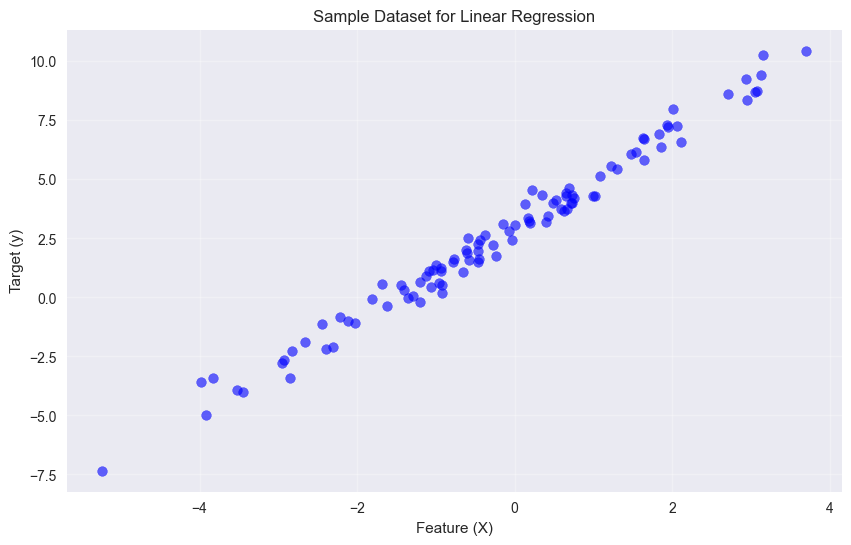

In [2]:
# Set random seed for reproducibility
np.random.seed(42)

# Generate sample data
n_samples = 100
X = np.random.randn(n_samples, 1) * 2
y = 3 + 2 * X.ravel() + np.random.randn(n_samples) * 0.5

# Create DataFrame for easier handling
df = pd.DataFrame({
    'feature': X.ravel(),
    'target': y
})

print(f"Dataset shape: {df.shape}")
print(f"\nFirst 5 rows:")
display(df.head())

# Visualize the data
plt.figure(figsize=(10, 6))
plt.scatter(X, y, alpha=0.6, color='blue')
plt.xlabel('Feature (X)')
plt.ylabel('Target (y)')
plt.title('Sample Dataset for Linear Regression')
plt.grid(True, alpha=0.3)
plt.show()

## **🔧 4. Linear Regression from Scratch**

In [3]:
class LinearRegressionScratch:
    """
    Linear Regression implementation from scratch using Normal Equation
    """
    
    def __init__(self):
        self.coefficients = None
        self.intercept    = None
    
    def fit(self, X, y):
        """
        Fit the linear regression model using Normal Equation
        """
        # Add bias column (intercept term)
        X_with_bias = np.c_[np.ones(X.shape[0]), X]
        
        # Normal equation: β = (X^T X)^(-1) X^T y
        XtX = X_with_bias.T @ X_with_bias
        Xty = X_with_bias.T @ y
        
        # Solve for coefficients
        beta = np.linalg.solve(XtX, Xty)
        
        # Store intercept and coefficients
        self.intercept    = beta[0]
        self.coefficients = beta[1:]
        
        return self
    
    def predict(self, X):
        """
        Make predictions using the fitted model
        """
        return self.intercept + X @ self.coefficients
    
    def score(self, X, y):
        """
        Calculate R² score
        """
        y_pred = self.predict(X)
        ss_res = np.sum((y - y_pred) ** 2)
        ss_tot = np.sum((y - np.mean(y)) ** 2)
        return 1 - (ss_res / ss_tot)

# Test our implementation
model_scratch = LinearRegressionScratch()
model_scratch.fit(X, y)

print(f"Intercept   : {model_scratch.intercept:.2f}")
print(f"Coefficient : {model_scratch.coefficients[0]:.2f}")
print(f"R² Score    : {model_scratch.score(X, y):.2f}")

Intercept   : 3.00
Coefficient : 1.96
R² Score    : 0.98


## **🛠️ 5. Scikit-learn Implementation**

In [4]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and fit the model
model_sklearn = LinearRegression()
model_sklearn.fit(X_train, y_train)

# Make predictions
y_train_pred = model_sklearn.predict(X_train)
y_test_pred  = model_sklearn.predict(X_test)

print("📊 Model Parameters:")
print(f"Intercept   : {model_sklearn.intercept_:.2f}")
print(f"Coefficient : {model_sklearn.coef_[0]:.2f}")

print("\n📈 Performance Metrics:")
print(f"Train R²   : {r2_score(y_train, y_train_pred):.2f}")
print(f"Test  R²   : {r2_score(y_test, y_test_pred):.2f}")
print(f"Train RMSE : {np.sqrt(mean_squared_error(y_train, y_train_pred)):.2f}")
print(f"Test  RMSE : {np.sqrt(mean_squared_error(y_test, y_test_pred)):.2f}")
print(f"Test MAE   : {mean_absolute_error(y_test, y_test_pred):.2f}")

📊 Model Parameters:
Intercept   : 3.01
Coefficient : 1.96

📈 Performance Metrics:
Train R²   : 0.98
Test  R²   : 0.98
Train RMSE : 0.47
Test  RMSE : 0.47
Test MAE   : 0.37


## **📊 6. Model Visualization**

> ### **1. Residuals vs. Fitted**
- **Purpose**: Check for non-linearity and heteroscedasticity
- **Good**: Random scatter around zero
- **Bad**: Patterns or funnel shapes

> ### **2. Q-Q Plot**
- **Purpose**: Check normality of residuals
- **Good**: Points follow diagonal line
- **Bad**: Curved pattern

> ### **3. Residuals vs. Leverage**
- **Purpose**: Identify influential outliers
- **Watch for**: Points with high leverage and high residuals


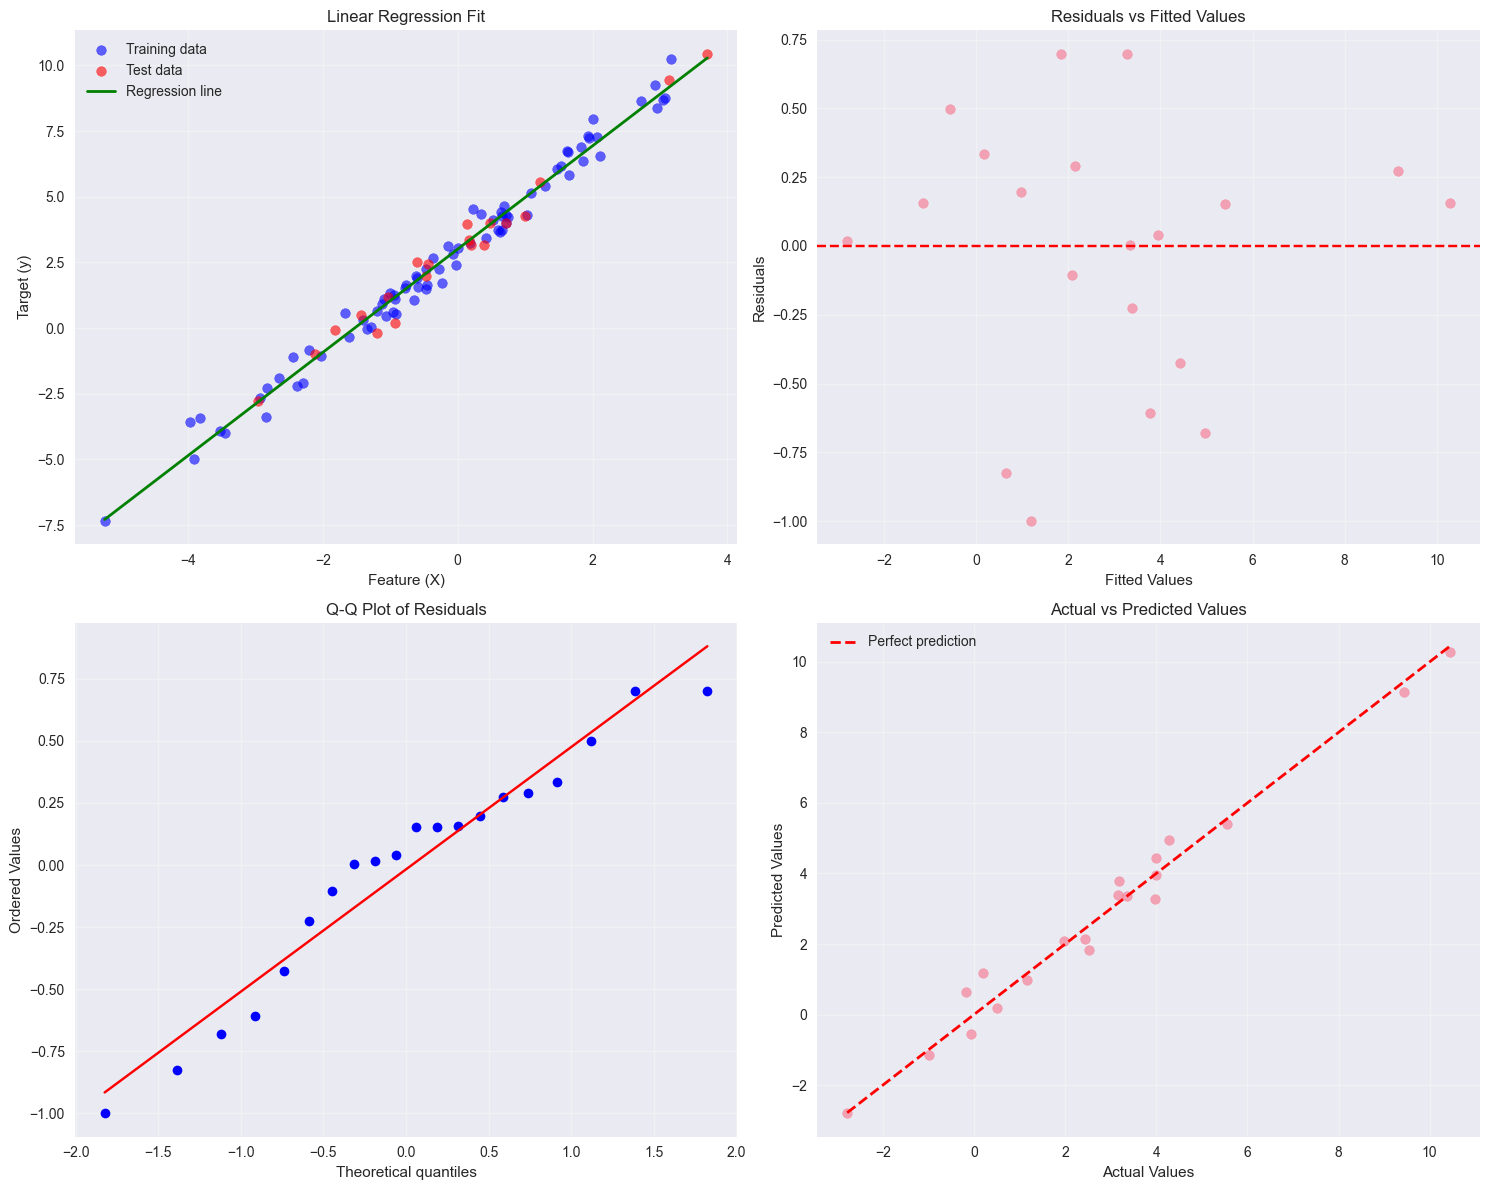

In [5]:
# Create visualization
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# 1. Regression line
axes[0, 0].scatter(X_train, y_train, alpha=0.6, label='Training data', color='blue')
axes[0, 0].scatter(X_test, y_test, alpha=0.6, label='Test data', color='red')

# Plot regression line
X_range = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)
y_range_pred = model_sklearn.predict(X_range)
axes[0, 0].plot(X_range, y_range_pred, color='green', linewidth=2, label='Regression line')

axes[0, 0].set_xlabel('Feature (X)')
axes[0, 0].set_ylabel('Target (y)')
axes[0, 0].set_title('Linear Regression Fit')
axes[0, 0].legend()
axes[0, 0].grid(True, alpha=0.3)

# 2. Residuals vs Fitted
residuals = y_test - y_test_pred
axes[0, 1].scatter(y_test_pred, residuals, alpha=0.6)
axes[0, 1].axhline(y=0, color='red', linestyle='--')
axes[0, 1].set_xlabel('Fitted Values')
axes[0, 1].set_ylabel('Residuals')
axes[0, 1].set_title('Residuals vs Fitted Values')
axes[0, 1].grid(True, alpha=0.3)

# 3. Q-Q plot for residuals
stats.probplot(residuals, dist="norm", plot=axes[1, 0])
axes[1, 0].set_title('Q-Q Plot of Residuals')
axes[1, 0].grid(True, alpha=0.3)

# 4. Actual vs Predicted
axes[1, 1].scatter(y_test, y_test_pred, alpha=0.6)
axes[1, 1].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', linewidth=2, label='Perfect prediction')
axes[1, 1].set_xlabel('Actual Values')
axes[1, 1].set_ylabel('Predicted Values')
axes[1, 1].set_title('Actual vs Predicted Values')
axes[1, 1].legend()
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## **✅ 7. Assumption Checking**

1. **Linearity**: The relationship between X and y is linear
2. **Independence**: Observations are independent of each other
3. **Homoscedasticity**: Constant variance of residuals
4. **Normality**: Residuals are normally distributed
5. **No Multicollinearity**: Features are not highly correlated

In [6]:
def check_assumptions(X, y, model, alpha=0.05):
    """
    Check linear regression assumptions with input validation and diagnostic tests.
    
    Parameters:
    - X     : Feature matrix (numpy array or pandas DataFrame)
    - y     : Target vector (numpy array or pandas Series)
    - model : Fitted scikit-learn LinearRegression model
    - alpha : Significance level for statistical tests (default: 0.05)
    """
    # Input validation
    if not isinstance(model, LinearRegression):
        raise ValueError("Model must be a fitted scikit-learn LinearRegression instance")
    if not hasattr(model, 'coef_'):
        raise ValueError("Model must be fitted before checking assumptions")
    
    # Convert inputs to numpy arrays
    X = np.array(X)
    y = np.array(y)
    
    # Ensure X is 2D array
    if len(X.shape) == 1:
        X = X.reshape(-1, 1)
    
    # Check shapes
    if X.shape[0] != y.shape[0]:
        raise ValueError(f"X and y must have same number of samples. Got {X.shape[0]} vs {y.shape[0]}")
    
    y_pred    = model.predict(X)
    residuals = y - y_pred
    
    print("🔍 LINEAR REGRESSION ASSUMPTIONS CHECK")
    print("=" * 50)
    
    try:
        # 1. Linearity (correlation between X and y)
        if X.shape[1] == 1:
            correlation = np.corrcoef(X.ravel(), y)[0, 1]
            print(f"1. Linearity")
            print(f"   Correlation coefficient: {correlation:.4f}")
            print(f"   Status: {'✅ GOOD' if abs(correlation) > 0.3 else '⚠️ WEAK LINEAR RELATIONSHIP'}\n")
        else:
            print(f"1. Linearity")
            print(f"   Multiple features - check scatter plots separately\n")
        
        # 2. Independence (Durbin-Watson test)
        dw_stat = durbin_watson(residuals)
        print(f"2. Independence")
        print(f"   Durbin-Watson statistic: {dw_stat:.4f}")
        print(f"   Status: {'✅ GOOD' if 1.5 < dw_stat < 2.5 else '⚠️ POTENTIAL AUTOCORRELATION'}\n")
        
        # 3. Homoscedasticity (Breusch-Pagan test)
        # Add constant to X for Breusch-Pagan test
        X_with_const = np.c_[X, np.ones(X.shape[0])]
        _, bp_pvalue, _, _ = het_breuschpagan(residuals, X_with_const)
        print(f"3. Homoscedasticity")
        print(f"   Breusch-Pagan test p-value: {bp_pvalue:.4f}")
        print(f"   Status: {'✅ GOOD' if bp_pvalue > alpha else '⚠️ HETEROSCEDASTICITY DETECTED'}\n")
        
        # 4. Normality of residuals (Shapiro-Wilk test)
        if len(residuals) > 5000:
            print(f"4. Normality of Residuals")
            print(f"   Warning: Shapiro-Wilk test unreliable for large samples (>5000). Consider Anderson-Darling test.\n")
        else:
            _, shapiro_pvalue = stats.shapiro(residuals)
            print(f"4. Normality of Residuals")
            print(f"   Shapiro-Wilk test p-value: {shapiro_pvalue:.4f}")
            print(f"   Status: {'✅ GOOD' if shapiro_pvalue > alpha else '⚠️ RESIDUALS NOT NORMALLY DISTRIBUTED'}\n")
        
        # 5. No multicollinearity (for multiple features)
        if X.shape[1] > 1:
            vif_data = pd.DataFrame()
            vif_data["Feature"] = [f"X{i}" for i in range(X.shape[1])]
            vif_data["VIF"] = [variance_inflation_factor(X, i) for i in range(X.shape[1])]
            
            print(f"5. Multicollinearity")
            print(vif_data)
            max_vif = vif_data["VIF"].max()
            print(f"   Status: {'✅ GOOD' if max_vif < 5 else '⚠️ HIGH MULTICOLLINEARITY'}")
        else:
            print(f"5. Multicollinearity")
            print(f"   Single feature - not applicable")
        
    except Exception as e:
        print(f"Error occurred during assumption checking: {str(e)}")
        return
    
    print("=" * 50)
    print("✅ = Assumption satisfied")
    print("⚠️ = Assumption violated or needs attention")

# Check assumptions
check_assumptions(X_test, y_test, model_sklearn)

🔍 LINEAR REGRESSION ASSUMPTIONS CHECK
1. Linearity
   Correlation coefficient: 0.9888
   Status: ✅ GOOD

2. Independence
   Durbin-Watson statistic: 2.4092
   Status: ✅ GOOD

3. Homoscedasticity
   Breusch-Pagan test p-value: 0.5243
   Status: ✅ GOOD

4. Normality of Residuals
   Shapiro-Wilk test p-value: 0.2815
   Status: ✅ GOOD

5. Multicollinearity
   Single feature - not applicable
✅ = Assumption satisfied
⚠️ = Assumption violated or needs attention


## **🎯 8. Cross-Validation**

🔄 Cross-Validation Results:
R² Scores     : [0.98204071 0.9797806  0.98097786 0.98493599 0.97955437]
Mean R²       : 0.9815 (+/- 0.0039)

RMSE Scores   : [0.48754957 0.54496284 0.433201   0.52665224 0.37774904]
Mean RMSE     : 0.4740 (+/- 0.1230)


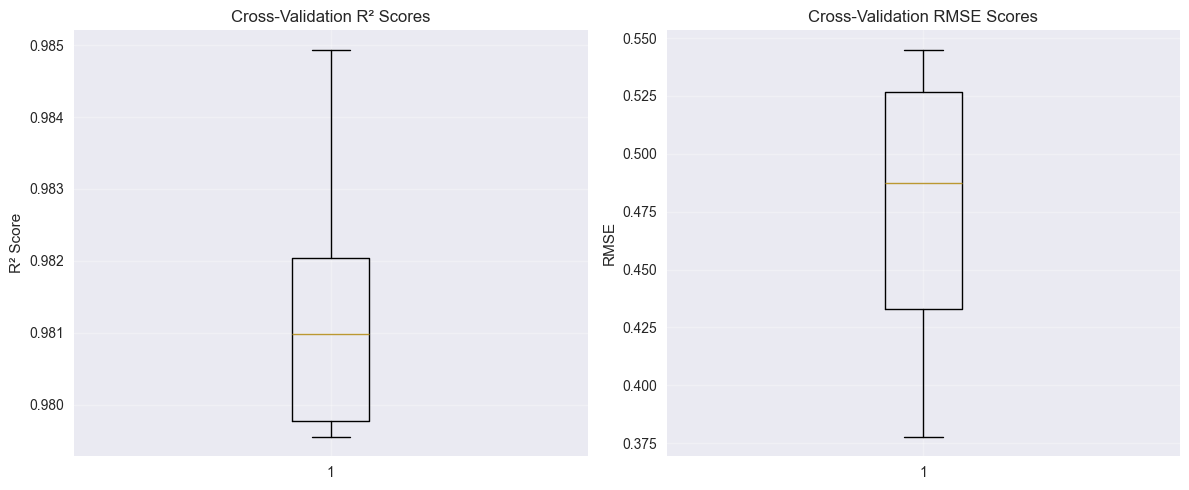

In [7]:
# Perform cross-validation
cv_scores = cross_val_score(model_sklearn , X, y, cv=5, scoring='r2')
cv_rmse   = -cross_val_score(model_sklearn, X, y, cv=5, scoring='neg_root_mean_squared_error')

print("🔄 Cross-Validation Results:")
print(f"R² Scores     : {cv_scores}")
print(f"Mean R²       : {cv_scores.mean():.4f} (+/- {cv_scores.std() * 2:.4f})")
print(f"\nRMSE Scores   : {cv_rmse}")
print(f"Mean RMSE     : {cv_rmse.mean():.4f} (+/- {cv_rmse.std() * 2:.4f})")

# Visualize cross-validation scores
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

axes[0].boxplot(cv_scores)
axes[0].set_title('Cross-Validation R² Scores')
axes[0].set_ylabel('R² Score')
axes[0].grid(True, alpha=0.3)

axes[1].boxplot(cv_rmse)
axes[1].set_title('Cross-Validation RMSE Scores')
axes[1].set_ylabel('RMSE')
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## **📝 9. Key Takeaways and Interpretation**

In [8]:
print("📋 Linear Regression Analysis Summary")
print("=" * 50)

print(f"📊 Model Performance:")
print(f"   • R² Score : {r2_score(y_test, y_test_pred):.4f}")
print(f"   • RMSE     : {np.sqrt(mean_squared_error(y_test, y_test_pred)):.4f}")
print(f"   • MAE      : {mean_absolute_error(y_test, y_test_pred):.4f}")

print(f"\n🎯 Model Parameters:")
print(f"   • Intercept (β₀) : {model_sklearn.intercept_:.4f}")
print(f"   • Slope (β₁)     : {model_sklearn.coef_[0]:.4f}")
print(f"   • Equation       : y = {model_sklearn.intercept_:.4f} + {model_sklearn.coef_[0]:.4f}x")

print(f"\n📈 Interpretation:")
print(f"   • For every 1 unit increase in X, y increases by {model_sklearn.coef_[0]:.4f} units")
print(f"   • When X = 0, the predicted value of y is {model_sklearn.intercept_:.4f}")
print(f"   • The model explains {r2_score(y_test, y_test_pred)*100:.1f}% of the variance in y")

print(f"\n✅ Next Steps:")
print(f"   • Verify all assumptions are met")
print(f"   • Consider polynomial features if non-linearity exists")
print(f"   • Try regularized regression (Ridge/Lasso) for multiple features")
print(f"   • Collect more data if performance is insufficient")
print("=" * 50)

📋 Linear Regression Analysis Summary
📊 Model Performance:
   • R² Score : 0.9777
   • RMSE     : 0.4671
   • MAE      : 0.3694

🎯 Model Parameters:
   • Intercept (β₀) : 3.0073
   • Slope (β₁)     : 1.9646
   • Equation       : y = 3.0073 + 1.9646x

📈 Interpretation:
   • For every 1 unit increase in X, y increases by 1.9646 units
   • When X = 0, the predicted value of y is 3.0073
   • The model explains 97.8% of the variance in y

✅ Next Steps:
   • Verify all assumptions are met
   • Consider polynomial features if non-linearity exists
   • Try regularized regression (Ridge/Lasso) for multiple features
   • Collect more data if performance is insufficient


<div style="width: 100%; height: 10px; background: linear-gradient(to right, gray, white, orange,white, gray); border-radius: 5px; margin: 20px 0;"></div>

> ## **✅ Advantages**

- **Simplicity**: Easy to understand and implement
- **Interpretability**: Coefficients show feature importance and direction
- **Fast Training**: Closed-form solution available
- **No Hyperparameters**: No tuning required for basic version
- **Baseline Model**: Good starting point for regression problems
- **Statistical Inference**: Confidence intervals and p-values available

> ## **❌ Disadvantages**

- **Linear Assumption**: Can't capture non-linear relationships
- **Sensitive to Outliers**: Outliers can significantly affect the model
- **Feature Scaling**: Performance affected by feature scales
- **Overfitting**: With many features relative to samples
- **Multicollinearity**: Unstable when features are correlated

## **🎯 When to Use Linear Regression**

> ### **✅ Good For:**
- **Linear Relationships**: When the relationship is approximately linear
- **Interpretability**: When you need to explain the model
- **Baseline Model**: Quick initial model to establish performance
- **Small Datasets**: Works well with limited data
- **Feature Importance**: Understanding which features matter

> ### **❌ Avoid When:**
- **Non-linear Patterns**: Complex relationships between variables
- **Many Outliers**: Data contains significant outliers
- **High Dimensionality**: More features than samples
- **Non-continuous Target**: Target variable is categorical

<div style="width: 100%; height: 10px; background: linear-gradient(to right, gray, white, orange,white, gray); border-radius: 5px; margin: 20px 0;"></div>

## **🎯 Implementation Steps**

> ### **1. Data Preparation**
```python
# Load and explore data
# Handle missing values
# Feature scaling (if needed)
# Train-test split
```

> ### **2. Model Training**
```python
# Fit the model
# Calculate coefficients
# Make predictions
```

> ### **3. Model Evaluation**
```python
# Calculate metrics
# Residual analysis
# Check assumptions
```

> ### **4. Model Interpretation**
```python
# Analyze coefficients
# Feature importance
# Confidence intervals
```
<div style="width: 100%; height: 10px; background: linear-gradient(to right, gray, white, orange,white, gray); border-radius: 5px; margin: 20px 0;"></div>

## **🚀 Real-World Applications**

- **Economics**: Demand forecasting, price modeling
- **Marketing**: Sales prediction, campaign effectiveness
- **Finance**: Risk assessment, portfolio optimization
- **Healthcare**: Drug dosage effects, treatment outcomes
- **Real Estate**: Property valuation
- **Manufacturing**: Quality control, process optimization
<div style="width: 100%; height: 100px; background: linear-gradient(to right, gray, white, orange,white, gray); border-radius: 5px; margin: 20px 0;"></div>